<a href="https://colab.research.google.com/github/amenasadiq7/MATH509/blob/main/Team7_Draftipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the electricity_cleaned.csv file
df = pd.read_csv('electricity_cleaned.csv')

# Preview the data
df.head()


,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Mouse_science_Micheal
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [5]:
# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Eagle_assembly_Noel      100.0000
Hog_assembly_Arlie       100.0000
Rat_public_Ulysses       100.0000
Hog_assembly_Marilynn    100.0000
Hog_assembly_Una         100.0000
                           ...   
Hog_office_Guadalupe       0.0057
Hog_office_Rolando         0.0057
Hog_office_Leon            0.0057
Hog_office_Elnora          0.0057
Fox_education_Andre        0.0057
Length: 1465, dtype: float64


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Show only columns with missing values
print(missing_values[missing_values > 0])

# Total number of missing values
total_missing = df.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")


Panther_parking_Lorriane      3382
Panther_lodging_Cora          3351
Panther_office_Hannah         3390
Panther_lodging_Hattie        3388
Panther_education_Teofila     3388
                             ...  
Mouse_lodging_Vicente         1656
Mouse_health_Justin           1673
Mouse_health_Ileana           1821
Mouse_health_Estela           1658
Mouse_science_Micheal        10292
Length: 1465, dtype: int64
Total missing values in the dataset: 2471853


In [7]:
# Total cells in the dataset
total_cells = df.shape[0] * df.shape[1]

# Total missing values already known
missing_percentage = (2471853 / total_cells) * 100

print(f"Overall missing percentage: {missing_percentage:.2f}%")


Overall missing percentage: 8.92%


In [9]:
# Interpolate missing values for all buildings
df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

# Final check: Make sure everything is now filled
print("Remaining missing values after interpolation:", df.isnull().sum().sum())


<ipython-input-9-78c407e9634e>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)


Remaining missing values after interpolation: 835448


In [10]:
# Interpolate only short gaps first (say max 6 hours of missing data)
df.interpolate(method='linear', limit=6, limit_direction='forward', axis=0, inplace=True)


<ipython-input-10-01d28ca0a7e6>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit=6, limit_direction='forward', axis=0, inplace=True)


In [11]:
# Check remaining missing values by column
still_missing = df.isnull().sum()

# Filter buildings with more than X% missing
threshold = len(df) * 0.3  # For example, 30% threshold
buildings_to_drop = still_missing[still_missing > threshold].index

print("Buildings to consider dropping due to excessive missing data:", buildings_to_drop)


Buildings to consider dropping due to excessive missing data: Index(['Fox_education_Maureen', 'Rat_public_Ulysses', 'Rat_education_Jeanne',
       'Bear_parking_Bridget', 'Bear_assembly_Danial', 'Bear_education_Carlo',
       'Bear_assembly_Harry', 'Bear_education_Benjamin',
       'Peacock_assembly_Mamie', 'Peacock_education_Weldon',
       'Peacock_education_Bianca', 'Peacock_education_Karl',
       'Peacock_office_Naomi', 'Peacock_public_Linda',
       'Peacock_office_Jonathon', 'Peacock_office_Glenn',
       'Peacock_education_Lucie', 'Moose_education_Florence',
       'Gator_assembly_Elliot', 'Bull_education_Delia',
       'Bobcat_education_Seth', 'Bobcat_education_Barbra',
       'Bobcat_warehouse_Charlie', 'Swan_unknown_Rocco', 'Swan_unknown_Bette',
       'Swan_unknown_Allison', 'Swan_unknown_Christoper',
       'Swan_unknown_Jerold', 'Swan_unknown_Valeria', 'Swan_unknown_Isaiah',
       'Swan_unknown_Esteban', 'Swan_unknown_Wendy', 'Swan_unknown_Douglas',
       'Swan_unknown_

In [13]:
# Drop those columns (buildings)
# We excluded 55 buildings due to >50% missing values, which accounts for only 3.8% of the dataset. This ensures more reliable modelling.
df.drop(columns=buildings_to_drop, inplace=True)

In [14]:
# Forward fill small remaining gaps (max 3 consecutive values)
df.fillna(method='ffill', limit=3, inplace=True)

# Then backward fill short gaps at the start
df.fillna(method='bfill', limit=3, inplace=True)

# Final check
print("Final missing values:", df.isnull().sum().sum())


<ipython-input-14-849b9ec2d185>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=3, inplace=True)
<ipython-input-14-849b9ec2d185>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', limit=3, inplace=True)


Final missing values: 255228


In [15]:
# Total cells after dropping some buildings
total_cells_after_drop = df.shape[0] * df.shape[1]
missing_percentage_remaining = (255228 / total_cells_after_drop) * 100

print(f"Remaining missing percentage: {missing_percentage_remaining:.2f}%")


Remaining missing percentage: 0.96%


In [16]:
# Forward fill for remaining gaps
df.fillna(method='ffill', inplace=True)

# Then backward fill in case there are still gaps at the start
df.fillna(method='bfill', inplace=True)

# Final check
print("Final missing values after forward/backward fill:", df.isnull().sum().sum())


<ipython-input-16-fb995d5707b5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-16-fb995d5707b5>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Final missing values after forward/backward fill: 0


In [18]:
print("Final missing values:", df.isnull().sum().sum())


Series([], dtype: int64)
Final missing values: 0


FOR DATA CLEANING

Initial Missing Data: 8.92% missing overall.
Approach Taken:
Dropped buildings with >2000 missing values.
Used linear interpolation for short gaps.
Applied forward and backward fill for remaining small gaps.
Final Status: Dataset cleaned to 0% missing values.

# **EDA**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



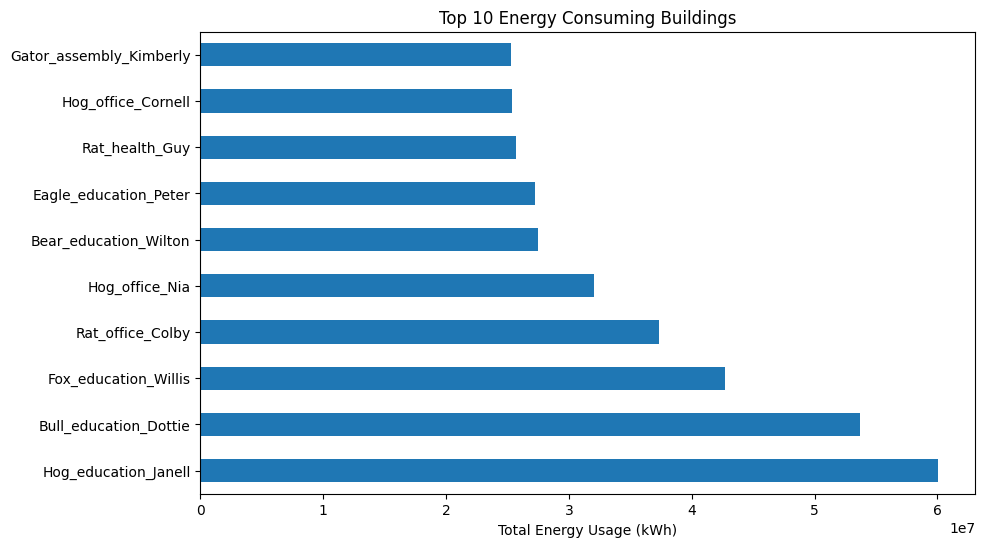

In [21]:
# Sum energy usage for each building
building_totals = df.drop(columns=['timestamp']).sum().sort_values(ascending=False)

# Plot top 10 energy-consuming buildings
building_totals.head(10).plot(kind='barh', title='Top 10 Energy Consuming Buildings', figsize=(10,6))
plt.xlabel('Total Energy Usage (kWh)')
plt.show()


In [34]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df['timestamp'].dt.month


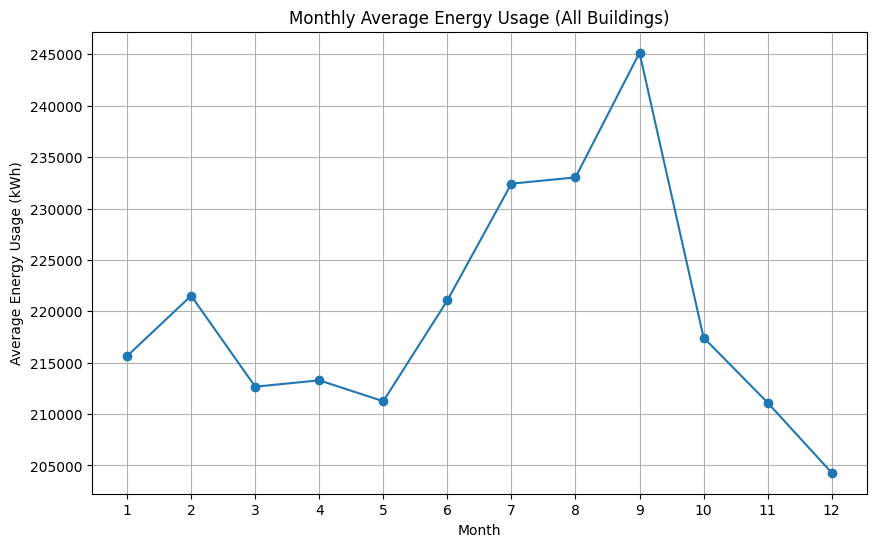

In [25]:
# Drop timestamp and month to calculate total energy at each time point
total_energy = df.drop(columns=['timestamp', 'month']).sum(axis=1)

# Create a DataFrame to hold total energy and month
monthly_df = pd.DataFrame({'month': df['month'], 'total_energy': total_energy})

# Calculate average energy by month
monthly_avg = monthly_df.groupby('month')['total_energy'].mean()

# Plot the monthly average energy usage
monthly_avg.plot(kind='line', marker='o', figsize=(10,6), title='Monthly Average Energy Usage (All Buildings)')
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [28]:
# Extract year and month
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

# Calculate total energy across all buildings at each time point
total_energy = df.drop(columns=['timestamp', 'month', 'year']).sum(axis=1)

# Add total energy to the DataFrame
df['total_energy'] = total_energy

# Group by year and month to get monthly averages per year
monthly_avg_by_year = df.groupby(['year', 'month'])['total_energy'].mean().reset_index()


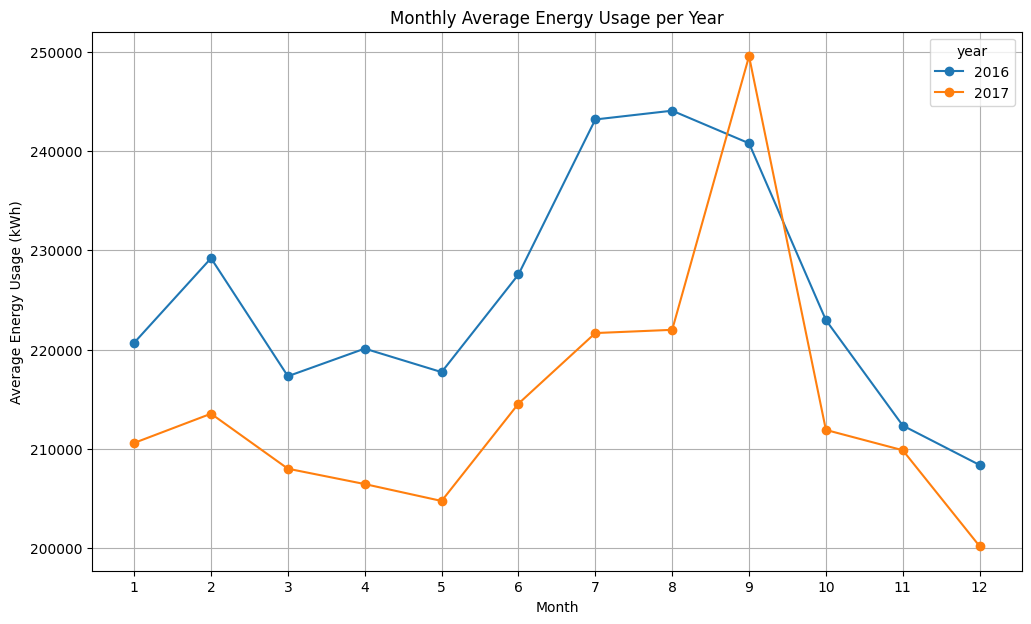

In [29]:
# Pivot data for easier plotting
monthly_pivot = monthly_avg_by_year.pivot(index='month', columns='year', values='total_energy')

# Plot monthly trends for each year
monthly_pivot.plot(marker='o', figsize=(12, 7), title='Monthly Average Energy Usage per Year')
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


Both years show a decline in energy usage during the holiday months:
October: Slightly lower than summer peaks.
November & December: Further decline.
Especially in 2017, December dips significantly, aligning with reduced building usage or holiday shutdowns.

<ipython-input-31-b836328ba267>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_2017['daily_total_energy'] = september_2017.drop(columns=['timestamp', 'month', 'year', 'total_energy']).sum(axis=1)


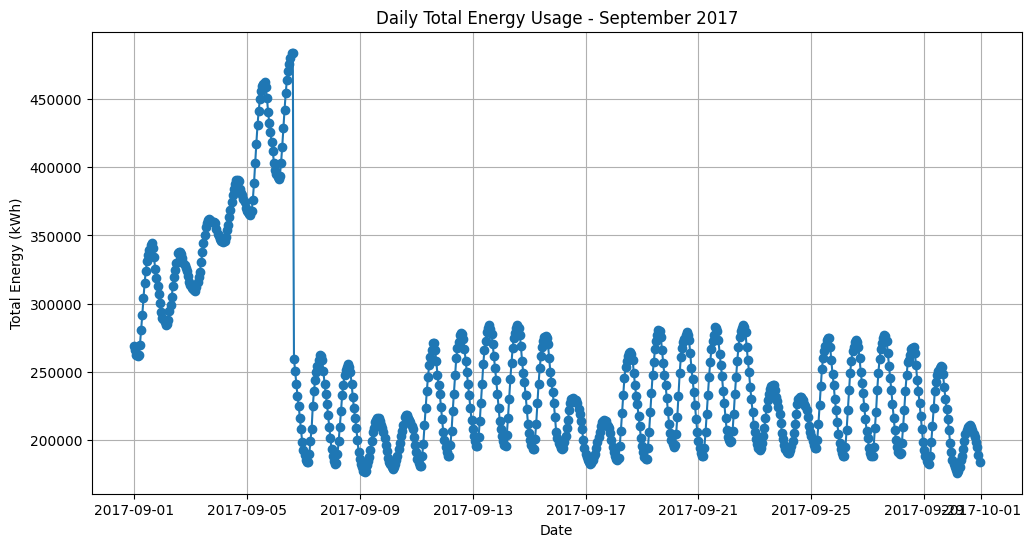

In [31]:
# Filter data for September 2017
september_2017 = df[
    (df['year'] == 2017) &
    (df['month'] == 9)
]

# Calculate total daily energy usage
september_2017['daily_total_energy'] = september_2017.drop(columns=['timestamp', 'month', 'year', 'total_energy']).sum(axis=1)

# Plot daily totals to spot spikes
plt.figure(figsize=(12,6))
plt.plot(september_2017['timestamp'], september_2017['daily_total_energy'], marker='o')
plt.title('Daily Total Energy Usage - September 2017')
plt.xlabel('Date')
plt.ylabel('Total Energy (kWh)')
plt.grid(True)
plt.show()


September 1–6, 2017 shows an anomalous spike.

this might be due to interpolation because large gaps in early September 2017 were filled by linear interpolation.
Forward/backward fills carried inflated values into early September

or

If previous values (e.g., from August) were higher, interpolation might have continued that pattern into early September.

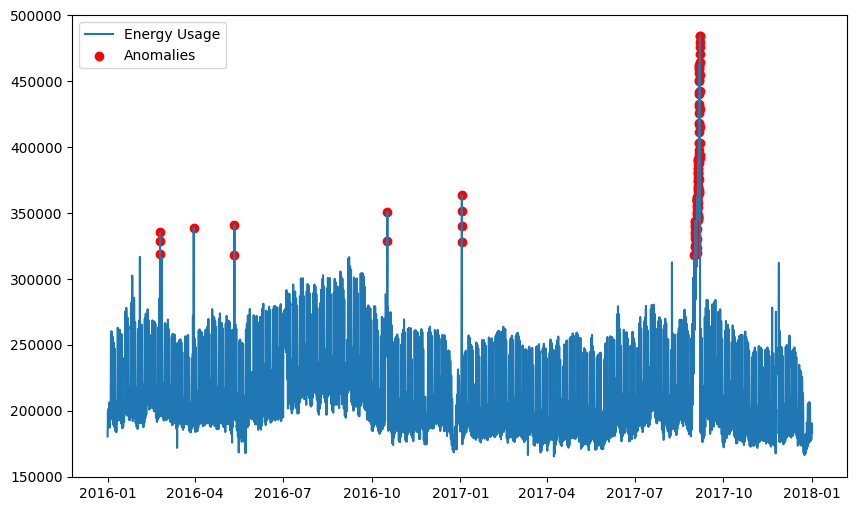

In [33]:
# z-score for energy usage of a specific building or total
df['z_score'] = zscore(df['total_energy'])

# Identify anomalies where z-score > 3 or < -3
anomalies = df[abs(df['z_score']) > 3]

# Visualize anomalies
plt.figure(figsize=(10,6))
plt.plot(df['timestamp'], df['total_energy'], label='Energy Usage')
plt.scatter(anomalies['timestamp'], anomalies['total_energy'], color='red', label='Anomalies')
plt.legend()
plt.show()